## Question 5, a-d

In [234]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
#references: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV            


In [235]:
#loading data
filname='Real estate valuation data set.xlsx'
df=pd.read_excel(filname)
data=np.array(df)
train_X,test_X,train_Y, test_Y = train_test_split(data[:,1:7],data[:,-1])
train_Y=np.array([train_Y]).T
test_Y=np.array([test_Y]).T
for i in [train_X,test_X,train_Y, test_Y]:      #verifying  the shapes compatibility
    print (i.shape)

(310, 6)
(104, 6)
(310, 1)
(104, 1)


In [236]:
df[:10]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [237]:
def normalize(X):
    X_=[]
    for i in range(len(X[0])):
        X_.append(X[:,i]/X[:,i].max())
    X_=np.array(X_).T
    return X_
def RMSE(y1,y2):
    #calculating RMS
    y1=np.transpose(y1)[0]
    y2=np.transpose(y2)[0]
    rmse=(sum(((y1-y2)**2))/len(y1))**0.5
    return rmse
train_X_=normalize(train_X)
test_X_=normalize(test_X)


In [238]:
clf_R=Ridge(alpha=0.1)
clf_R.fit(train_X_,train_Y)
y_R=clf_R.predict(test_X_)

clf_L=Lasso(alpha=0.1)
clf_L.fit(train_X_,train_Y)
y_L=clf_L.predict(test_X_)

y_R=np.reshape(y_R, test_Y.shape)
y_L=np.reshape(y_L, test_Y.shape)
print (RMSE(y_R, test_Y))
print(RMSE(y_L, test_Y))

9.581745426042877
9.499041935733802


## 5 (a) Cross Validation Ridge

In [239]:
lmda=10**np.linspace(6,-2,50)*0.5
ridge=Ridge(alpha=None)
thetas=[]
for i in lmda:
    ridge.set_params(alpha=i)
    ridge.fit(train_X_, train_Y)
    thetas.append(ridge.coef_)
thetas=np.reshape(thetas,(50,6))
#np.array(thetas).shape
ridgecv = RidgeCV(alphas=lmda,cv=5)
ridgecv.fit(train_X_, train_Y)
ridge.set_params(alpha=ridgecv.alpha_)
print("Best Alpha=", ridgecv.alpha_)
ridge.fit(train_X, train_Y.T[0])
print("rmse = ",mean_squared_error(test_Y.T[0], ridge.predict(test_X_))**0.5)
print("best model Theta Vector:",ridge.coef_)

Best Alpha= 0.9653488644416268
rmse =  11947.968237097797
best model Theta Vector: [ 5.95823419e+00 -2.79383731e-01 -5.48911258e-03  1.15864239e+00
  7.46277526e+00 -1.78337236e+00]


## 5 (b) Cross Validation Lasso

In [241]:
lmda=10**np.linspace(6,-2,50)*0.5
lasso=Lasso(max_iter=10000)
thetas=[]
for i in lmda:
    lasso.set_params(alpha=i)
    lasso.fit(train_X_, train_Y)
    thetas.append(lasso.coef_)
np.array(thetas).shape

(50, 6)

In [243]:
lassocv = LassoCV(alphas=lmda, cv=5, max_iter=10000)
lassocv.fit(train_X_, train_Y.T[0])
lasso.set_params(alpha=lassocv.alpha_)
print("Best Alpha=", lassocv.alpha_)
lasso.fit(train_X, train_Y.T[0])
print("rmse = ",mean_squared_error(test_Y.T[0], lasso.predict(test_X_))**0.5)
print("best model Theta Vector:",lasso.coef_)

Best Alpha= 0.03275642784297761
rmse =  11653.560131208718
best model Theta Vector: [ 5.79399810e+00 -2.78330565e-01 -5.51567898e-03  1.15938363e+00
  0.00000000e+00 -0.00000000e+00]


## 5(c) Regularisation Plot

Text(0.5,1,'Lasso Regularisation Plot')

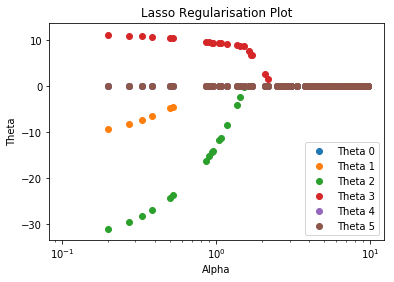

In [248]:
lmda=np.random.uniform(0,10,100)
theta_L=[]
theta_R=[]
for i in lmda:
    clf_R=Ridge(alpha=i)
    clf_R.fit(train_X_,train_Y)
    
    clf_L=Lasso(alpha=i)
    clf_L.fit(train_X_,train_Y)
    
    theta_L.append(clf_L.coef_)
    theta_R.append(clf_R.coef_[0])
theta_L=np.array(theta_L)
theta_R=np.array(theta_R)
[theta_L.shape, theta_R.shape]
for i in range(len(theta_L[0])):
    plt.scatter(lmda, theta_L[:,i], label="Theta "+str(i))
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Theta")
plt.legend()
plt.title("Lasso Regularisation Plot")

Text(0.5,1,'Ridge Regularisation Plot')

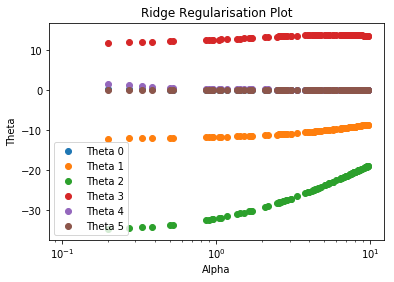

In [252]:
for i in range(len(theta_R[0])):
    plt.scatter(lmda, theta_R[:,i], label="Theta "+str(i))
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Theta")
plt.legend()
plt.title("Ridge Regularisation Plot")



Most of the values of the variables are zero which denotes the sparsity of the matrix

## 5(d) Error v/s Lambda for Ridge and Lasso

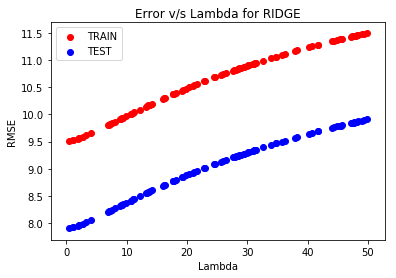

In [246]:
lmda=np.random.uniform(0,50,100)

rmse_R=[]
rmse_R1=[]
rmse_L=[]
rmse_L1=[]

split=int(0.8*len(data))
train_new=data[:split]
test_new=data[split:]
train_X_new=train_new[:,1:-1]
train_Y_new=train_new[:,-1:]
test_X_new=test_new[:,1:-1]
test_Y_new=test_new[:,-1:]

train_X_new=normalize(train_X_new)
test_X_new=normalize(test_X_new)

for i in lmda:
    clf_R=Ridge(alpha=i)
    clf_R.fit(train_X_new,train_Y_new)
    y_R=clf_R.predict(test_X_new)
    y_R1=clf_R.predict(train_X_new)
    
    clf_L=Lasso(alpha=i)
    clf_L.fit(train_X_new,train_Y_new)
    y_L=clf_L.predict(test_X_new)
    y_L1=clf_L.predict(train_X_new)
    
    y_R=np.reshape(y_R, test_Y_new.shape)
    y_L=np.reshape(y_L, test_Y_new.shape)
    y_R1=np.reshape(y_R1, train_Y_new.shape)
    y_L1=np.reshape(y_L1, train_Y_new.shape)
    
    
    rmse_R.append(RMSE(y_R,test_Y_new))
    rmse_L.append(RMSE(y_L,test_Y_new))
    rmse_R1.append(RMSE(y_R1,train_Y_new))
    rmse_L1.append(RMSE(y_L1,train_Y_new))


#plt.xscale('log')
plt.scatter(lmda, rmse_R1, color='r', label="TRAIN")
plt.scatter(lmda, rmse_R, color='b', label="TEST")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Error v/s Lambda for RIDGE")
plt.legend()
plt.show()

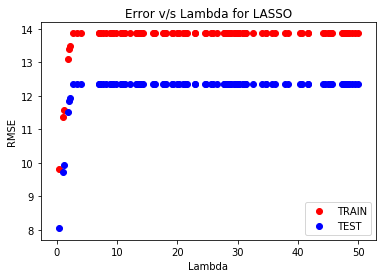

In [247]:
plt.scatter(lmda, rmse_L1, color='r', label="TRAIN")
plt.scatter(lmda, rmse_L, color='b', label="TEST")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Error v/s Lambda for LASSO")
plt.legend()
plt.show()